In [23]:
# 1. Import libraries and load data from cleaned CSV file
import pandas as pd

df = pd.read_csv('cleaned_bank.csv', sep=',')

In [24]:
#lets take a look at the first few rows of the dataset
df.columns

Index(['age', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'prior_contact', 'campaign_capped',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'po

In [25]:
#Lets do basic info check before EDA
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39328 entries, 0 to 39327
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            39328 non-null  int64  
 1   previous                       39328 non-null  int64  
 2   emp.var.rate                   39328 non-null  float64
 3   cons.price.idx                 39328 non-null  float64
 4   cons.conf.idx                  39328 non-null  float64
 5   euribor3m                      39328 non-null  float64
 6   nr.employed                    39328 non-null  float64
 7   y                              39328 non-null  int64  
 8   prior_contact                  39328 non-null  int64  
 9   campaign_capped                39328 non-null  int64  
 10  job_blue-collar                39328 non-null  bool   
 11  job_entrepreneur               39328 non-null  bool   
 12  job_housemaid                  39328 non-null 

,age,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,prior_contact,campaign_capped,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,...,True,False,False,False,True,False,False,False,True,False
1,57,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,...,True,False,False,False,True,False,False,False,True,False
2,37,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,...,True,False,False,False,True,False,False,False,True,False
3,40,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,...,True,False,False,False,True,False,False,False,True,False
4,56,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,...,True,False,False,False,True,False,False,False,True,False


Lets start doing some EDA on numerical features:

Below are some of the columns that will be used

Integers: age, previous, y, prior_contact, campaign_capped

Floats: emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed

In [26]:
#lets get some summary statistics for the numerical features
summary_num_cols = ['age', 'previous', 'y', 'prior_contact', 'campaign_capped','emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
df[summary_num_cols].describe()

,age,previous,y,prior_contact,campaign_capped,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,39328.000000,39328.000000,39328.000000,39328.000000,39328.000000,39328.000000,39328.000000,39328.000000,39328.000000,39328.000000
mean,40.123296,0.178677,0.116762,0.038268,2.307516,0.062614,93.577277,-40.499153,3.600014,5165.932799
std,10.462038,0.502933,0.321140,0.191845,1.558554,1.577317,0.584131,4.646164,1.742504,72.751951
min,17.000000,0.000000,0.000000,0.000000,1.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,0.000000,0.000000,0.000000,1.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,0.000000,0.000000,0.000000,2.000000,1.100000,93.798000,-41.800000,4.857000,5191.000000
75%,47.000000,0.000000,0.000000,0.000000,3.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,7.000000,1.000000,1.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


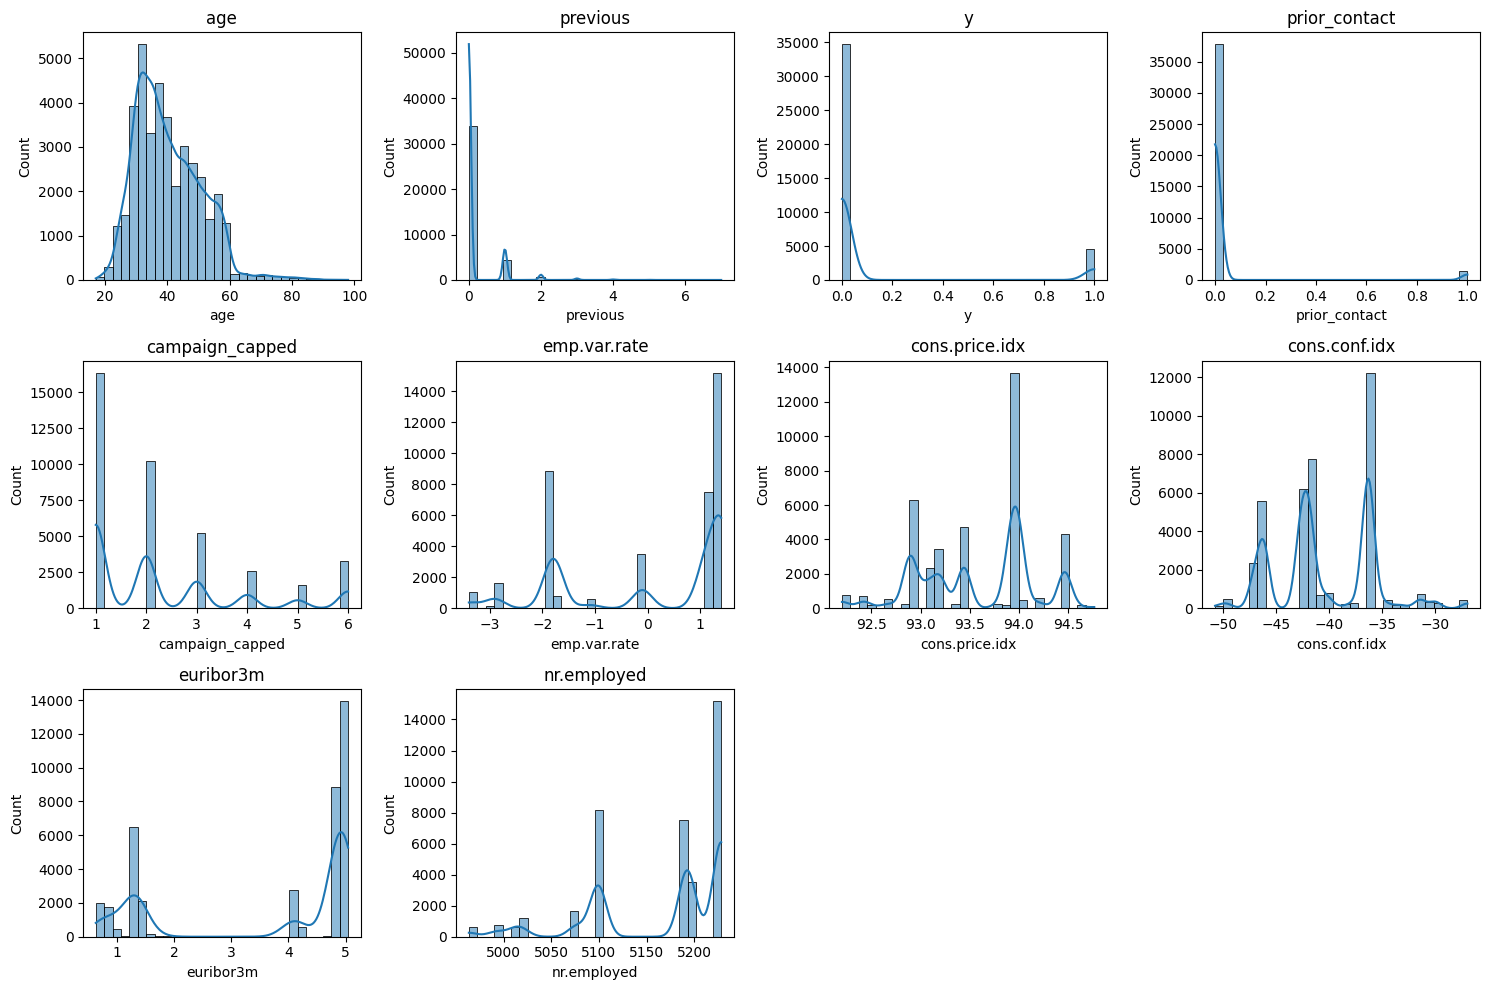

In [ ]:
#Now lets do a distribution plot for the numerical features
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 10))
for i, col in enumerate(summary_num_cols): #enumerate function gives both index and column name
    plt.subplot(3,4,i+1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()
